<a href="https://colab.research.google.com/github/muthuk72/Naive-Bayes-Machine-Learning/blob/main/Group141_DiabetesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<html> <h2  style="text-align:center"> BITS - Work Integrated Learning Programmes Division </h2>
<h3  style="text-align:center"> M. Tech. in Data Science and Engineering </h3>
<h3  style="text-align:center"> Assignment 1 - Group 141 - [Diabetes Detection] - DSECLZG565 - MACHINE LEARNING </h3>
<h3  style="text-align:center"> @authors: Muthukrishnan M, Naveena, Manimaran</h3>
<h3  style="text-align:center"> @student id: 2021fc04626, 2021fc04320, 2021fa04068</h3>
<a>_________________________________________________________________________________________________________________________</a>
 <h2  style="text-align:left">Problem Statement:</h2>
    <h4>Part A</h4>
    <a>1. Import Libraries/Dataset</a><br>
    <a>2. Data Visualization and Exploration</a><br>
    <a>3. Data Pre-processing and cleaning</a>
    <h4>Part B</h4>
    <a>1. Model Building</a><br>
    <a>2. Performance Evaluation</a>
    
</html>


## Introduction
Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms. The technique behind Naive Bayes is easy to understand.  Naive Bayes has higher accuracy and speed when we have large data points.

There are three types of Naive Bayes models: Gaussian, Multinomial, and Bernoulli.

* **Gaussian Naive Bayes** - This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed. 
* Multinomial Naive Bayes - This is another variant which is an event-based model that has features as vectors where sample(feature) represents frequencies with which certain events have occurred.
* Bernoulli - This variant is also event-based where features are independent boolean which are in binary form.

## 1. Import Libraries and Dataset

#### 1.1 Download the dataset

Dataset link: https://drive.google.com/file/d/1eVyUjbOReanPGIBFKxrWvWKZWi3MZOt3/view?usp=sharing
<br><br><a>The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, <b>Outcome</b>. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.</a>

#### 1.2 Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

#### Import Data

In [3]:
df = pd.read_csv('/content/diabetes.csv')

## 2. Data Visualzation and Exploration

<a>2.1. Print 2 rows for sanity check to identify all the features present in the dataset and if
the target matches with them</a>

In [4]:
# Display DataFrame
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


<a>2.2. Print the description and Basic statistical details.</a>

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<a> 2.3. Print each class label count (Activity) and create a pie chart for each class (% of data
distribution). Write your observation on data balancing.</a>

Text(0.5, 1.0, 'Histograms')

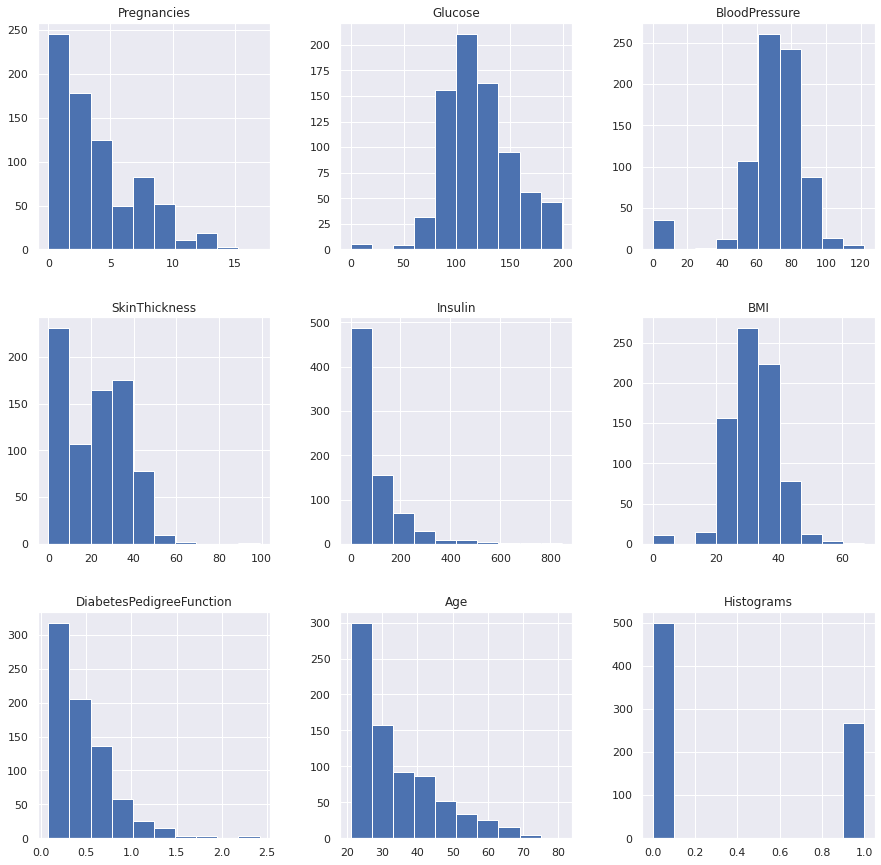

In [6]:
df.hist(figsize=(15,15))
plt.title("Histograms")

We have to predict whether or not the patients in the dataset have diabetes or not?

So let us check how many people have diabetes and how many of them do not

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

We can see from above plot that:

People who do not have diabetes: 500

People who have diabetes : 268


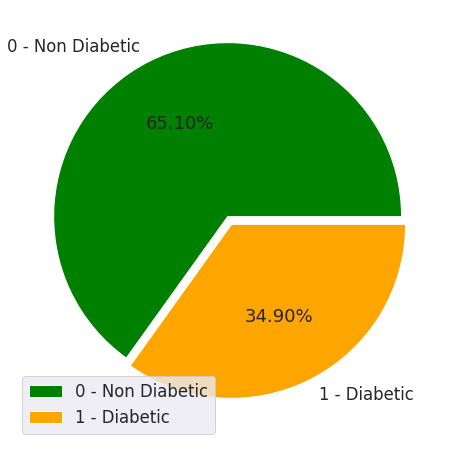

In [8]:
plt.figure(figsize=(8,8))
pieC = df['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['green', 'orange']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

We can see from above pie plot that:

65.10% out of 768 Pima Indian women do not have diabetes

34.90% out of 768 Pima Indian women have diabetes

In [9]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<a> 2.4 Plot Activities by Subject/Participants and Provide appropriate comments on visualized data </a>

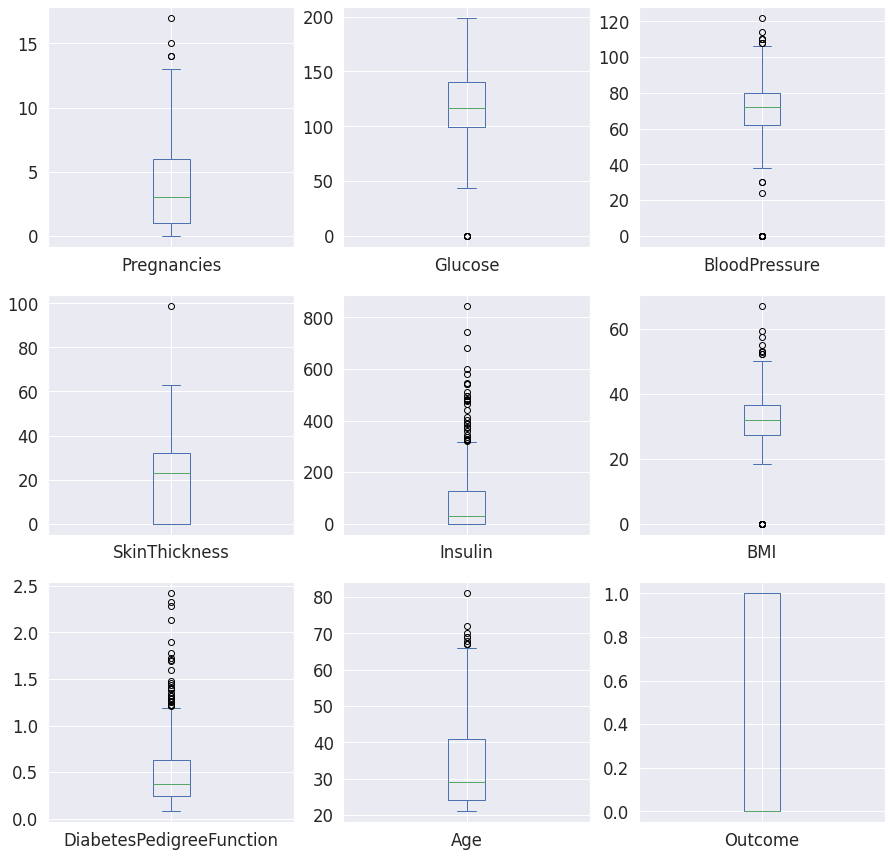

In [10]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

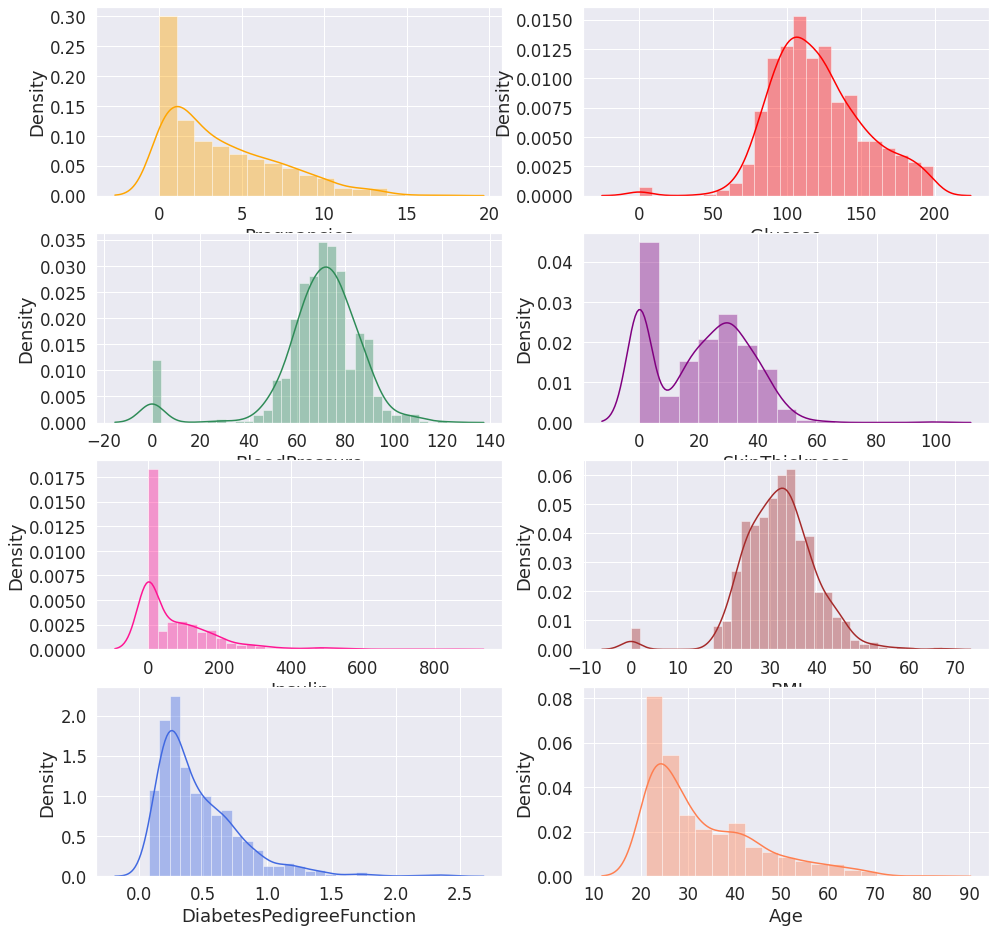

In [11]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.set(font_scale = 1)
sns.distplot(df.Pregnancies, ax = ax[0,0], color = 'orange')
sns.distplot(df.Glucose, ax = ax[0,1], color = 'red')
sns.distplot(df.BloodPressure, ax = ax[1,0], color = 'seagreen')
sns.distplot(df.SkinThickness, ax = ax[1,1], color = 'purple')
sns.distplot(df.Insulin, ax = ax[2,0], color = 'deeppink')
sns.distplot(df.BMI, ax = ax[2,1], color = 'brown')
sns.distplot(df.DiabetesPedigreeFunction, ax = ax[3,0], color = 'royalblue')
sns.distplot(df.Age, ax = ax[3,1], color = 'coral')


## 3. Data Pre-processing and cleaning

<a>3.1. Do the appropriate preprocessing steps
1. Identify NULL or Missing Values based on column. Apply appropriate feature
engineering techniques for them. </a>

Replace zero (0) values with NaN values and then sum the NaN values in each column to know get count of NaN values

In [12]:
df[(df.Glucose == 0) | (df.BloodPressure == 0) | (df.SkinThickness == 0) | (df.Insulin == 0) | (df.BMI == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
df[(df.DiabetesPedigreeFunction == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**NOTE/OBSERVATION**

We see that even though there are no NULL or NA values, a few columns have *0* as a value even though that cannot be the case. For these columns, 0 can be treated as NA and filled as per requirement (mean for numeric values and mode for categorical values)

**Therefore, Replacing 0s with NaN**

In [14]:
nan_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df[nan_cols] = df[nan_cols].replace(0,np.NaN)

In [15]:
df.isna().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [16]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
for col in nan_cols:
    df[col].fillna(df[col].mean(), inplace=True)

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a> 3.2. Use MinMax normalization for feature transformation.</a>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f155469c750>,
      dtype=object)

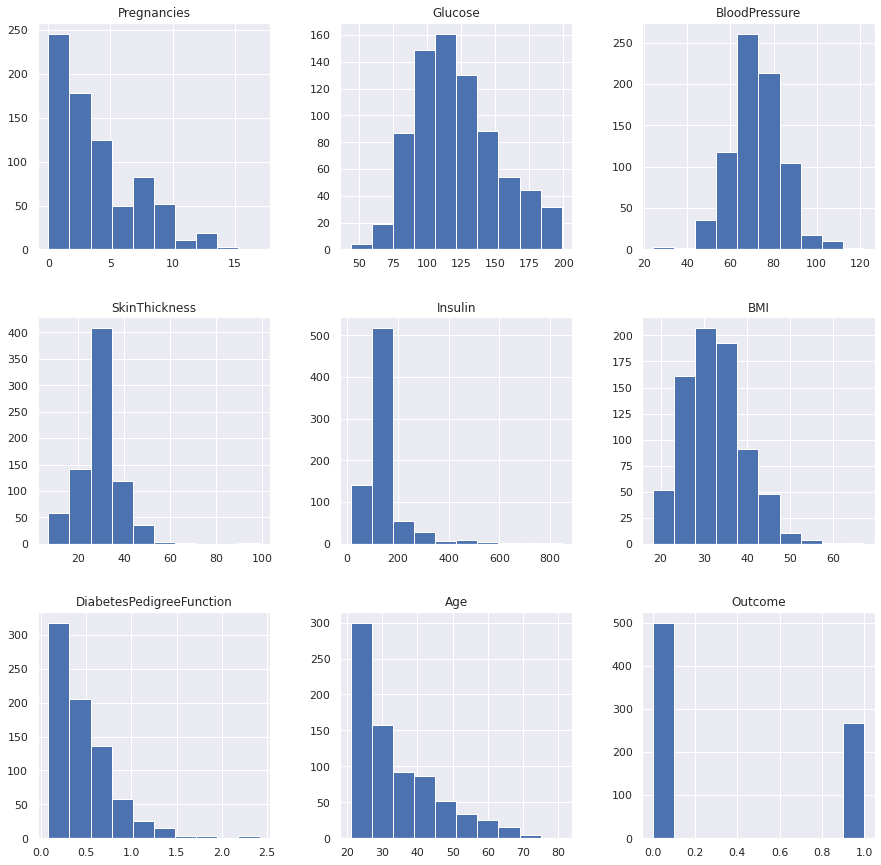

In [19]:
df.hist(figsize=(15,15))

All the data seems more natural now. The use of mean in some of the columns, for example, **Insulin** and **BMI** may have skewed the data. It is more preferable to use median for these 2 columns. However, it is in line with the assumption made.

<a>3.3 Do the correlational analysis on the dataset. Provide a visualization for the same.
Part </a>

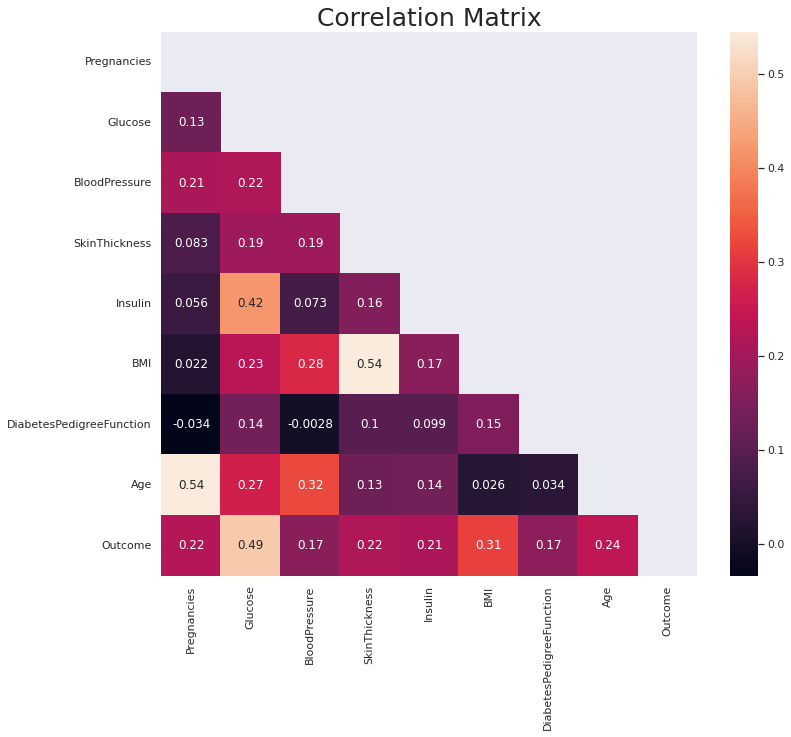

In [20]:
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix", fontsize=25)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask)

All the columns seem more or less independant. Some have a high correlation of around 0.5 but those are acceptable margins to continue forward.

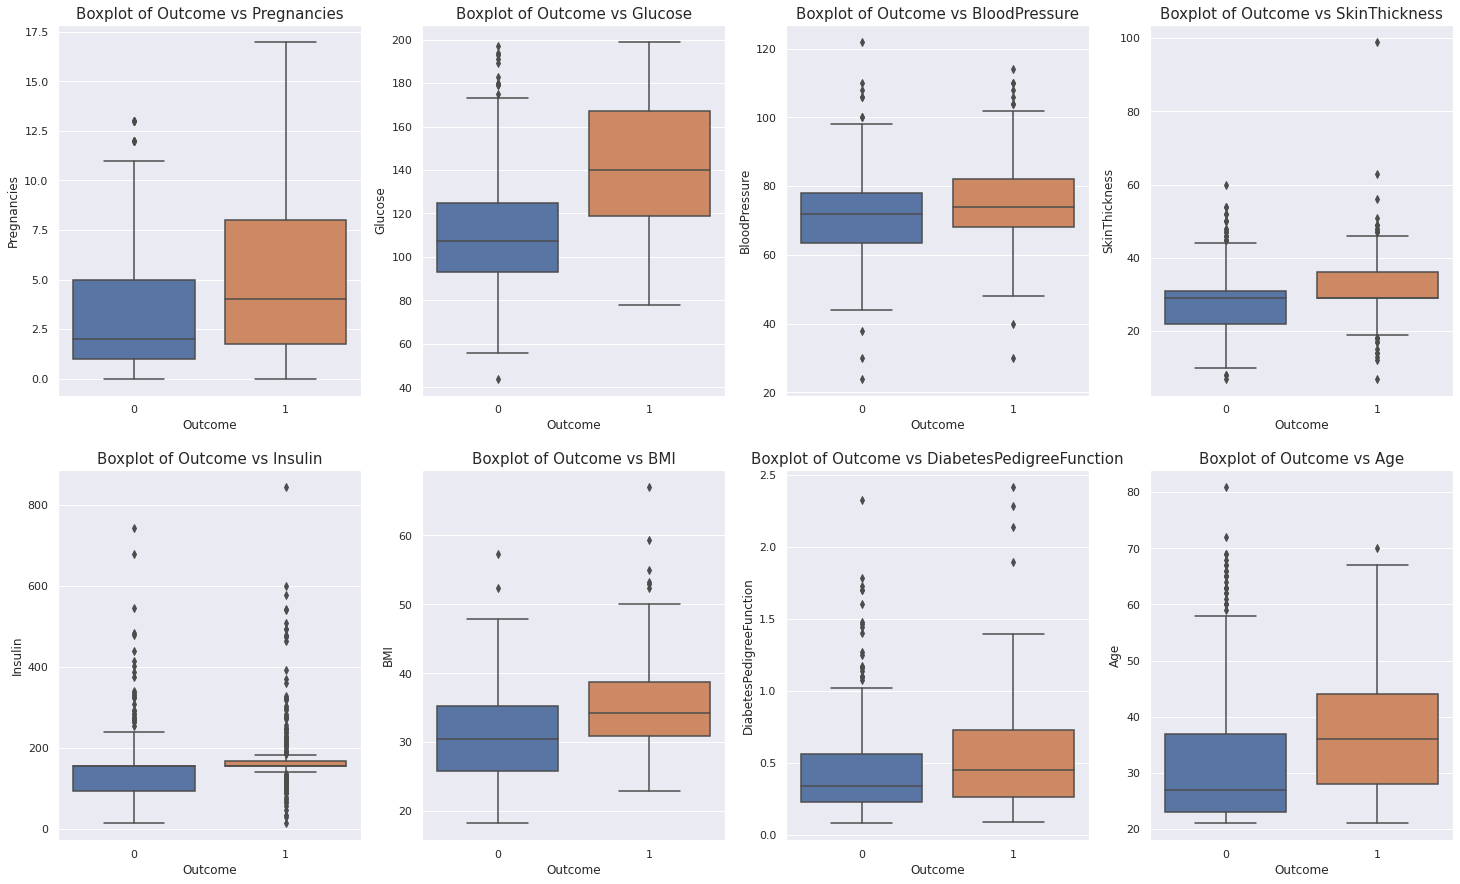

In [21]:
plt.figure(figsize=(25,15))
x_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y_cols = ['Outcome']
for i, col in enumerate(x_cols, start=1):
    
    plt.subplot(2,4,i)
    
    title_text = "Boxplot of Outcome vs "+col
    plt.title(title_text, fontsize=15)
    
    sns.boxplot(x=df['Outcome'], y=df[col])


The boxplots of Outcome=1 seem to be higher. This is expected as values of columns like BloodPressure, BMI and Age will be higher for Diabetic patients.

# Part B
## 1. Model Building

<a> 1.1. Perform Model Development using Naïve Bayes with appropriate hyper parameters.</a>

##### Naive Bayes is a classification algorithm, which uses Bayes theorem of probability for prediction of unknown class. It uses probability to decide which class a test point belongs to. Naive Bayes is a purely statistical model. This algorithm is called Naive due to the assumption that the features/ attributes in the datasets are mutually independent.

## Splitting Data
<a> We need to separate the columns into dependent (Outcome or label data ) and independent variables ( Eight features). X contains independent variable and y contains dependent variable. Then we will split these variables into train and test set. To split train and test set we will import train_test_split function.</a>

In [22]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

# Seperate columns in dependent and independent variables
x=df.drop("Outcome", axis=1)
y=df[["Outcome"]]

# Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

After splitting data into training and testing, we will generate a Naive Bayes model on the training set and perform prediction on the test datasets.

In [23]:
# Import Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Create a GaussianNB
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train, y_train)

# Predict the response for test datasets
y_pred = model.predict(x_test)

## 2. Performance Evaluation
To evaluate the model we will check the accuracy using actual and predicted values. We will firstly import metrics for accuracy calculation from sklearn and check how often the classifier correctly identified person with diabetes or not.

In [24]:
from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7835497835497836


we also generated a classification report to measure the quality if prediction from Naive Bayes model.

In [25]:
test_pred = model.predict(x_test)
nbConfusion = metrics.confusion_matrix(y_test, test_pred)


print(metrics.classification_report(y_test,test_pred))
print(nbConfusion)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.73      0.65      0.69        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231

[[126  20]
 [ 30  55]]


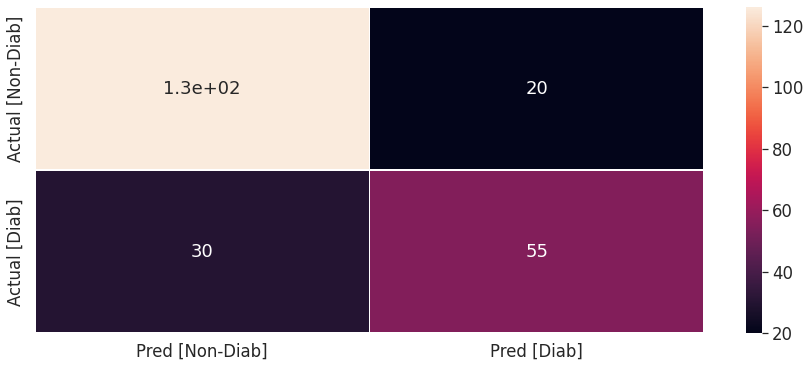

In [26]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

So here:

**TN** = 128

**TP** = 53

**FN** = 32

**FP** = 18

This is how I interpret the confusion matrix: 0 = No Diabetes; 1 = Diabetes

TP: Our model predicted 53 women as diabetic and in actual they were diabetic (Model was correct here)

TN: Our model predicted 128 women as non-diabetic and in actual they were non-diabetic (Model was correct here)

FP: Our model predicted 18 women as diabetic and in actual they were non-diabetic (Model was wrong here - "Type 1 error")

FN: Our model predicted 32 women as non-diabetic and in actual they were diabetic (Model was wrong here - "Type 2 error")Accuracy: Overall, how often is the classifier correct?

**Accuracy**: Overall, how often is the classifier correct?

Accuracy = (TP + TN)/ total
     = (53 + 128) / (53 + 128 + 18 + 32)

     =  181 / 231

     = 0.78354978354978354978354978354978

In [27]:
print('Accuracy of Naive Bayes Classifier is: ', model.score(x_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  78.35497835497836 %


In [28]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.73      0.65      0.69        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [29]:
nb_TP = nbConfusion[1, 1]
nb_TN = nbConfusion[0, 0]
nb_FP = nbConfusion[0, 1]
nb_FN = nbConfusion[1, 0]

**Precision**: Precsion tells us about when model predicts yes, how often is it correct.

TP/predicted yes

Precision = TP / (TP + FP)

= 53 / (53 + 18)

= 53 / 71

= 0.74647887323943661971830985915493

So when our model predict 1 and actual it is 1 then it's precision is 74%. It should be high as possible.

In [30]:
# print ('Precision: ', metrics.precision_score(y_test, nb_y_pred))
nb_Precision = nb_TP / ( nb_TP + nb_FP)
print ('Precision: ', nb_Precision)

Precision:  0.7333333333333333


**Recall**: When the actual value is positive, how often is the prediction correct?
    
TP/actual yes

Recall = TP / (TP + FN)
    
= 53 / (53 + 32)
        
= 53 / 85
    
= 0.62352941176470588235294117647059

When it's actually yes, how often does model predict yes?

Recall is also known as “sensitivity” and “true positive rate” (TPR).

In [31]:
nb_Recall = nb_TP / ( nb_TP + nb_FN )
print ('Recall: ', nb_Recall)

Recall:  0.6470588235294118


**F-measure**


It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

In other words the F1 score conveys the balance between the precision and the recall.

F1 = 2 * (Precision * Recall) / (Precision + Recall)

F1 = 2 * (0.74 * 0.62) / (0.74 + 0.62)

F1 = 2 * 0.4588 / 1.36

F1 = 0.674705882

In [32]:
metrics.f1_score(y_test, test_pred)

0.6875

**Specificity** (also called the **true negative rate**) measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

If a person does not have the disease how often will the test be negative (true negative rate)?

In [33]:
nb_Specificity = nb_TN / ( nb_TN + nb_FP )
print ('Specificity: ', nb_Specificity)

Specificity:  0.863013698630137


**Sensitivity** (also called the **true positive rate**, the **recall**, or **probability of detection** in some fields) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).

If a person has a disease, how often will the test be positive (true positive rate)? 

In [34]:
nb_Sensitivity = nb_TP / ( nb_TP + nb_FN )
print ('Sensitivity: ', nb_Sensitivity)

Sensitivity:  0.6470588235294118


**AUC ROC** tells how much model is capable of distinguishing between classes.

AUC is the Area under the Curve. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 

By analogy, Higher the AUC, better the model is at distinguishing between Pima Indian women with Diabetic and Non-Diabetic.

The ROC curve is plotted with **True Plot Rate (Sensitivity)** against the **False Plot Rate (1 - Specificity)** where TPR is on y-axis and FPR is on the x-axis

In [35]:
nb_Roc_Auc = metrics.roc_auc_score(y_test,test_pred)
print ('Roc Auc Score: ', nb_Roc_Auc)

Roc Auc Score:  0.7550362610797743


In [37]:
nb_y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, nb_y_pred_prob)

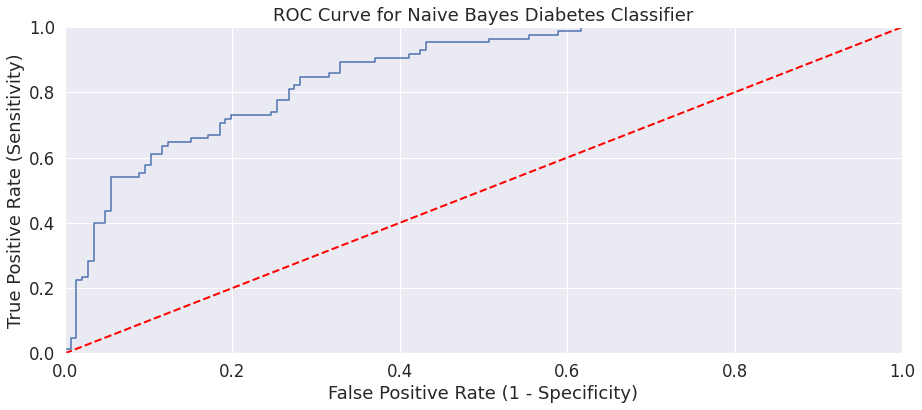

In [38]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
plt.plot(fpr, tpr)
plt.title('ROC Curve for Naive Bayes Diabetes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

**Analysis**

So it has a good **ROC AUC** score. There is **75%** chance that model will be able to distinguish between Diabetic class and Non-Diabetic class.

But, it fails tremendosly in the **sensitivity**. And the sensitivity, the recall is the thing that we want to improve. *Sensitivity: When the actual value is positive, how often is the prediction correct?*

Or in other words. If you have diabetes, will it detect it?

The problem with sensitivity is that it will detect diabetes to people who dont have diabetes. But it is better that, than sending someone home telling them that they do not have diabetes.

## Conclusion
<a>In this program\, we applied Naive Bayes classification algorithm to predict whether or not the patients in the dataset have diabetes or not. To evaluate the model we used accuracy and classification report generated using sklearn.</a>
